In [359]:
import numpy as np 
import pandas as pd 

import sqlite3 as sql 

import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno 
from utils import my_histogram

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df_match_player = pd.read_csv("../data/df_match_player.csv")
df_match_player

,match_api_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,492473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,492474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,492475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,492476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,492477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,1992091,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,42231.0,678384.0,95220.0,638592.0,413155.0,45780.0,171229.0,67333.0,119839.0,143790.0,195215.0,462944.0,563066.0,8800.0,67304.0,158253.0,133126.0,186524.0,93223.0,121115.0,232110.0,289732.0
25975,1992092,1.0,3.0,5.0,7.0,2.0,4.0,6.0,8.0,5.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,3.0,5.0,7.0,1.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,9.0,11.0,11.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0,33272.0,41621.0,25813.0,257845.0,114735.0,42237.0,113227.0,358156.0,32343.0,531309.0,37257.0,42276.0,114792.0,150007.0,178119.0,27232.0,570830.0,260708.0,201704.0,36382.0,34082.0,95257.0
25976,1992093,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,157856.0,274779.0,177689.0,294256.0,42258.0,39979.0,173936.0,147959.0,451983.0,80564.0,289472.0,10637.0,67349.0,202663.0,32597.0,114794.0,188114.0,25840.0,482200.0,95230.0,451335.0,275122.0
25977,1992094,1.0,2.0,4.0,6.0,8.0,3.0,7.0,5.0,3.0,5.0,7.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,NaN,8881.0,173534.0,39646.0,2

- There are 2 kinds of information in the df_match_player.
    - player position: home_player_X#, home_player_Y#, away_player_X#, away_player_Y# where # $\in [1, 11]$
    - starting lineup: home_player_#, away_player_# where # $\in [1, 11]$

# 1. Player position

In [9]:
player_position_col = ["match_api_id", 'home_player_X1', 'home_player_X2', 'home_player_X3',
                       'home_player_X4', 'home_player_X5', 'home_player_X6', 
                       'home_player_X7', 'home_player_X8', 'home_player_X9', 
                       'home_player_X10','home_player_X11', 'away_player_X1', 
                       'away_player_X2', 'away_player_X3', 'away_player_X4', 
                       'away_player_X5', 'away_player_X6', 'away_player_X7',
                       'away_player_X8', 'away_player_X9', 'away_player_X10',
                       'away_player_X11', 'home_player_Y1', 'home_player_Y2', 
                       'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 
                       'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 
                       'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 
                       'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
                       'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 
                       'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 
                       'away_player_Y10', 'away_player_Y11']

In [10]:
df_match_player_position = df_match_player[player_position_col]
df_match_player_position

,match_api_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11
0,492473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,492474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,492475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,492476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,492477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,1992091,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0
25975,1992092,1.0,3.0,5.0,7.0,2.0,4.0,6.0,8.0,5.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,3.0,5.0,7.0,1.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,9.0,11.0,11.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0
25976,1992093,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0
25977,1992094,1.0,2.0,4.0,6.0,8.0,3.0,7.0,5.0,3.0,5.0,7.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0


- The X and Y variables identify the position of the player on the field. \
- The field is divided X and Y coordinates. 
    - the X coordinates are on the goalline ranging 1-9
    - the Y coordinates are along the length of the field ranging 1-11.
- All keepers have coordinates (1,1), while all field players can have an X-coordinate 2-9 and an Y-coordinate 2-11. 
- (ex) If the second field player of the hometeam has coordinates (2,3), (thus: home_player_X2 = 2 and home_player_Y2 = 3), you can infer he plays on the left side of the field (X=2) as a defender (Y=3). He must thus be a left defender in this match.
- The distinction between defender, midfielder, forward is a bit arbitrary. I assume that Y coordinates between 2 and 5 are defenders, Y coordinates between 6 and 8 are midfielders and Y coordinates 9-11 are forwards.

(https://www.kaggle.com/datasets/hugomathien/soccer/discussion/30200#176414)

In [11]:
df_match_player_position.isna().sum()

match_api_id          0
home_player_X1     1821
home_player_X2     1821
home_player_X3     1832
home_player_X4     1832
home_player_X5     1832
home_player_X6     1832
home_player_X7     1832
home_player_X8     1832
home_player_X9     1832
home_player_X10    1832
home_player_X11    1832
away_player_X1     1832
away_player_X2     1832
away_player_X3     1832
away_player_X4     1832
away_player_X5     1832
away_player_X6     1832
away_player_X7     1832
away_player_X8     1832
away_player_X9     1833
away_player_X10    1833
away_player_X11    1839
home_player_Y1     1821
home_player_Y2     1821
home_player_Y3     1832
home_player_Y4     1832
home_player_Y5     1832
home_player_Y6     1832
home_player_Y7     1832
home_player_Y8     1832
home_player_Y9     1832
home_player_Y10    1832
home_player_Y11    1832
away_player_Y1     1832
away_player_Y2     1832
away_player_Y3     1832
away_player_Y4     1832
away_player_Y5     1832
away_player_Y6     1832
away_player_Y7     1832
away_player_Y8  

<AxesSubplot:>

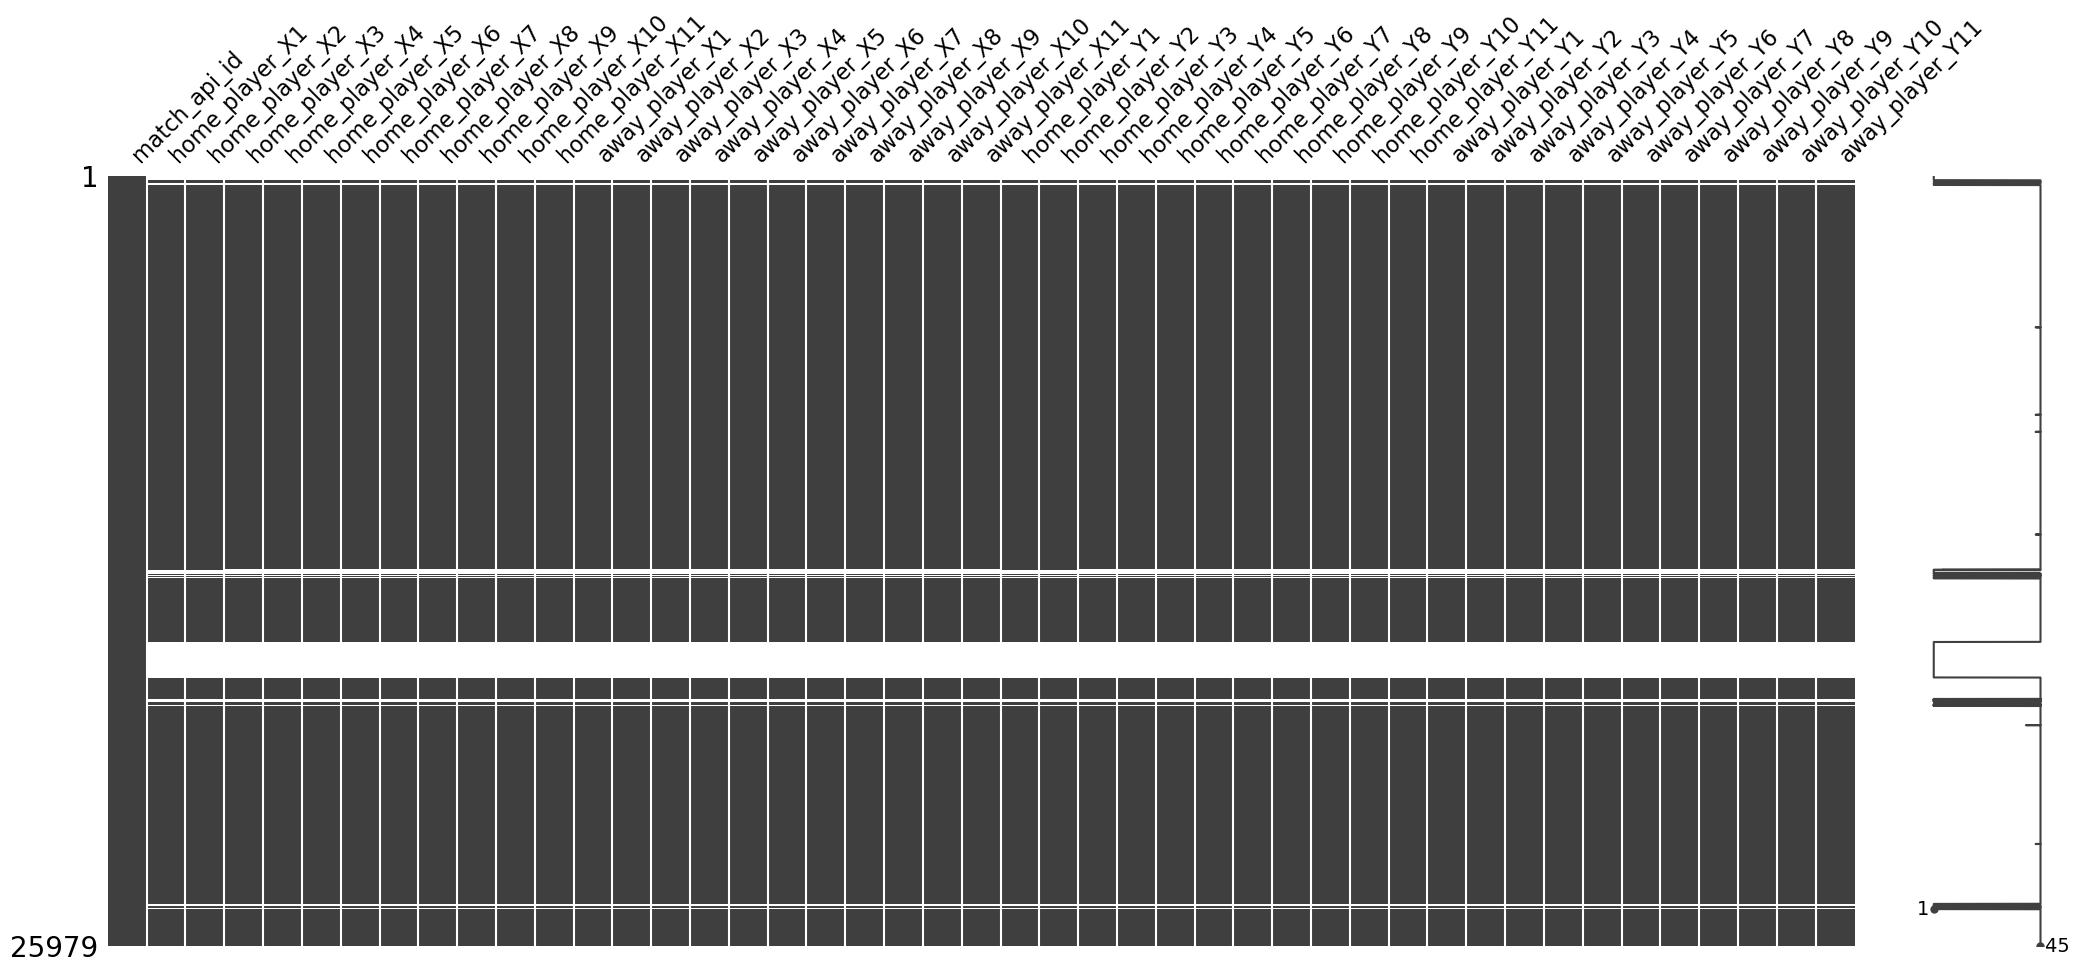

In [12]:
msno.matrix(df_match_player_position)

- Ther are about 1800 missing values from each column.
- There is a pattern in the missing values: If one position column has missing value, all other position columns aslo have missing value.

- Let's check the missing values from the player starting lineup together.

<AxesSubplot:>

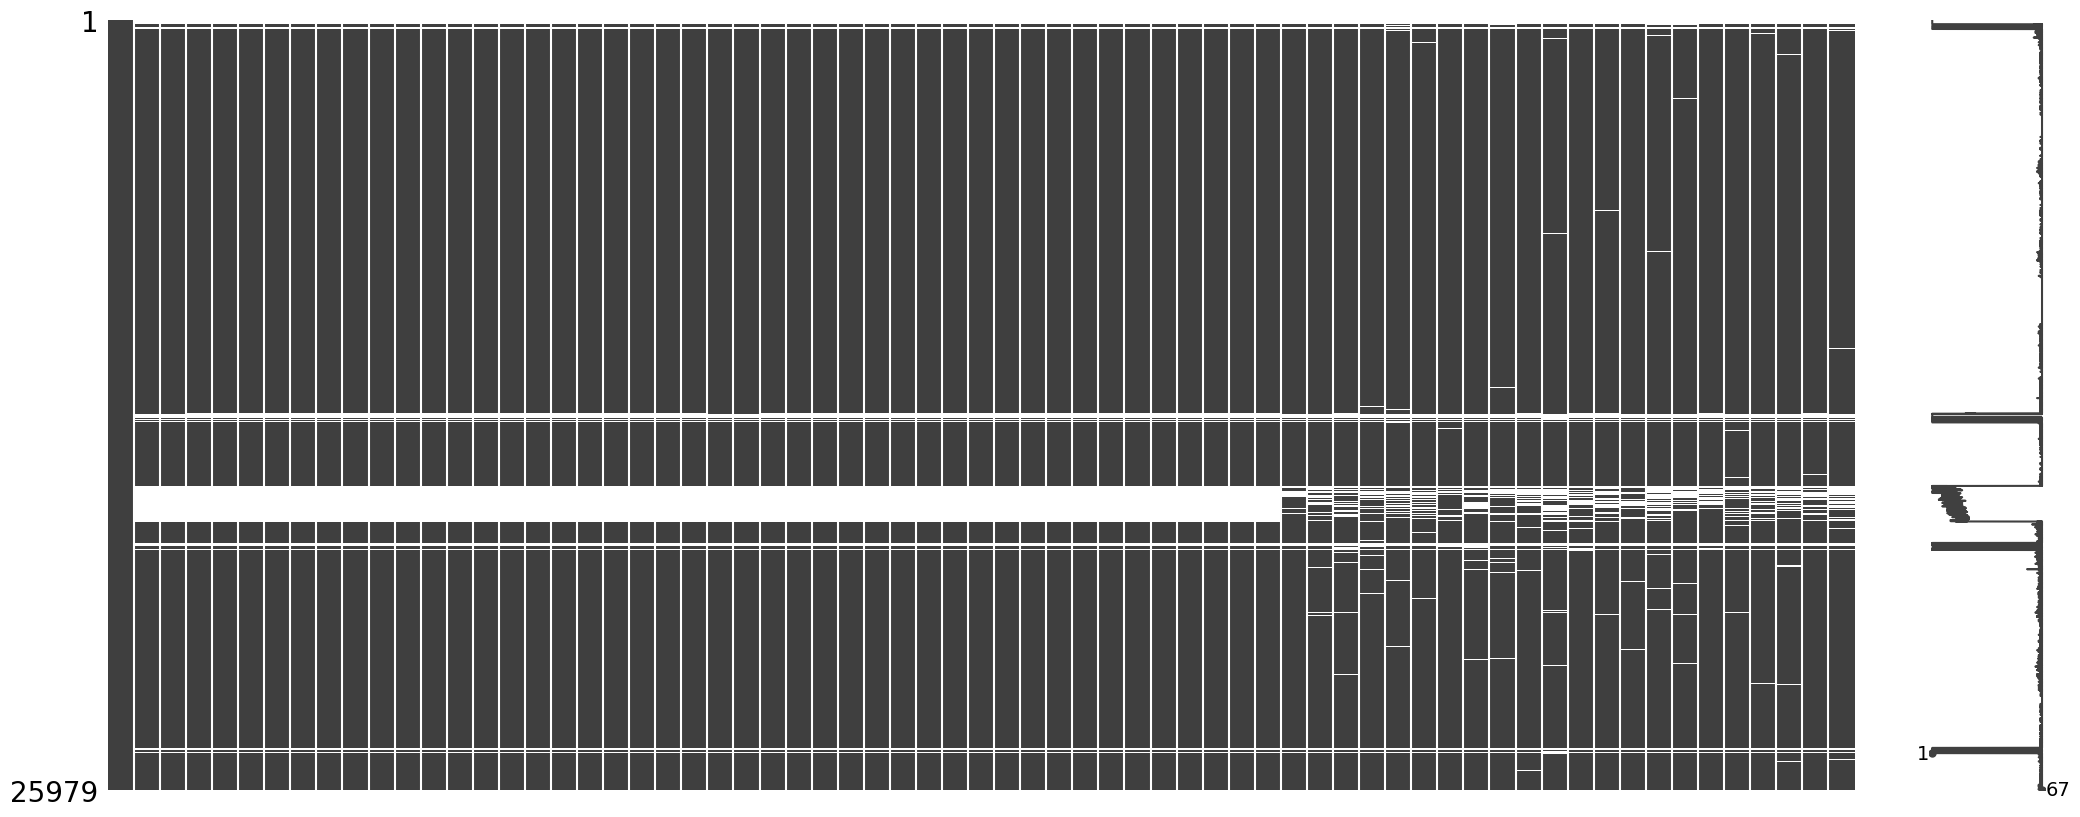

In [14]:
msno.matrix(df_match_player)

- If there is a missing value in the player position, starting lineup columns also have the missing values.
- Since starting lineups are very important features, let's just drop the matches that have the missing values in the player positions and the starting lineups columns.

In [19]:
df_match_player = df_match_player.dropna()
df_match_player.shape

(21361, 67)

- After drop the matches, we have 21,361 matches. (25,979 matches -> 21,351 matches)

In [20]:
df_match_player_position = df_match_player[player_position_col]

- Save the updated the train and test match_api_id list.

In [502]:
target_id = df_match_player_position.match_api_id.unique()

In [507]:
train_match_api_id = pd.read_csv("../data/train_match_api_id.csv")
train_match_api_id.shape

(22653, 1)

In [508]:
train_match_api_id = train_match_api_id[train_match_api_id.match_api_id.isin(target_id)]
train_match_api_id.shape

(18343, 1)

- After drop the matches that don't have player position and lineup information, train matches become 22,653 -> 18,343 

In [509]:
test_match_api_id = pd.read_csv("../data/test_match_api_id.csv")
test_match_api_id.shape

(3326, 1)

In [510]:
test_match_api_id = test_match_api_id[test_match_api_id.match_api_id.isin(target_id)]
test_match_api_id.shape

(3018, 1)

- After drop the matches that don't have player position and lineup information, test matches become 3,326 -> 3,018

In [511]:
train_match_api_id.to_csv("../data/train_match_api_id.csv", index = False)
test_match_api_id.to_csv("../data/test_match_api_id.csv", index = False)

## 1.1. Formation

- We can compress the X, Y position information of 11 players (22 columns) into one formation information by using the characteristics of these variables.

In [39]:
df_match_player_position.home_player_X1.unique()

array([1.])

In [41]:
df_match_player_position.home_player_Y1.unique()

array([1.])

In [40]:
df_match_player_position.away_player_X1.unique()

array([1.])

In [42]:
df_match_player_position.away_player_Y1.unique()

array([1.])

- Home and away player 1 awlays have (X = 1, Y = 1) position.

In [29]:
df_match_player_position[df_match_player_position.match_api_id == 493017]

,match_api_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11
145,493017,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0


- In match_api_id = 493017, home_player_X# are: 1 / 2, 4, 6, 8 / 2, 4, 6, 8 / 4, 6
- The first player's X position is 1 and is always goalkeeper.
- The X position of the remaining 10 players shows a pattern of increasing, then decreasing, and then increasing again.
- Based on this decreasing part, we can figure out the formation.
- In this case, the formation is 4-4-2.

In [34]:
df_match_player_position[df_match_player_position.match_api_id == 1992092]

,match_api_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11
25975,1992092,1.0,3.0,5.0,7.0,2.0,4.0,6.0,8.0,5.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,3.0,5.0,7.0,1.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,9.0,11.0,11.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0


- In match_api_id = 1992092, home_player_X# are 1 / 3, 5, 7 / 2, 4, 6, 8 / 5 / 4, 6
- In this case, the formation is 3-4-1-2.

- Let's make the formation column by using above information.

In [110]:
df_match_player_position_home = df_match_player_position[["match_api_id", 'home_player_X2', 'home_player_X3',
                                                          'home_player_X4', 'home_player_X5', 'home_player_X6', 
                                                          'home_player_X7', 'home_player_X8', 'home_player_X9', 
                                                          'home_player_X10','home_player_X11']]

In [111]:
df_match_player_position_away = df_match_player_position[["match_api_id", 'away_player_X2', 'away_player_X3',
                                                          'away_player_X4', 'away_player_X5', 'away_player_X6', 
                                                          'away_player_X7', 'away_player_X8', 'away_player_X9', 
                                                          'away_player_X10','away_player_X11']]

In [155]:
home_formation_list = []

for match_api_id in df_match_player_position_home.match_api_id:
    position_array = df_match_player_position_home[df_match_player_position_home.match_api_id == match_api_id].values[0][1:]
    
    position_temp = position_array[1:]
    position_temp_shift = position_array[: -1]
    res = ((position_temp - position_temp_shift) > 0)
    
    target_index = np.where(res== False)[0]
    
    formation_temp = []

    before_index = 0
    for i in target_index:
        formation_temp.append(sum(res[before_index:i]) + 1)
        before_index = i 
    
    formation_temp.append(10 - sum(formation_temp))
    
    formation_res = "".join(str(x) for x in formation_temp)
    
    home_formation_list.append(formation_res)

In [157]:
away_formation_list = []

for match_api_id in df_match_player_position_home.match_api_id:
    position_array = df_match_player_position_away[df_match_player_position_away.match_api_id == match_api_id].values[0][1:]
    
    position_temp = position_array[1:]
    position_temp_shift = position_array[: -1]
    res = ((position_temp - position_temp_shift) > 0)
    
    target_index = np.where(res== False)[0]
    
    formation_temp = []

    before_index = 0
    for i in target_index:
        formation_temp.append(sum(res[before_index:i]) + 1)
        before_index = i 
    
    formation_temp.append(10 - sum(formation_temp))
    
    formation_res = "".join(str(x) for x in formation_temp)
    
    away_formation_list.append(formation_res)

In [278]:
df_match_formation = pd.DataFrame({"match_api_id": df_match_player.match_api_id,
                                  "home_formation_by_X": home_formation_list,
                                  "away_formation_by_X": away_formation_list})
df_match_formation

,match_api_id,home_formation_by_X,away_formation_by_X
145,493017,442,442
153,493025,442,442
155,493027,442,442
162,493034,442,442
168,493040,442,442
...,...,...,...
25972,1992089,442,4231
25974,1992091,4231,4231
25975,1992092,3412,433
25976,1992093,4231,4231


In [280]:
pd.concat([df_match_formation.home_formation_by_X, df_match_formation.away_formation_by_X]).value_counts()

4231       10969
442        10146
433         7315
451         1869
4411        1627
           ...  
12331          1
13141          1
21421          1
312121         1
1112221        1
Length: 147, dtype: int64

In [281]:
np.sum(pd.concat([df_match_formation.home_formation_by_X, df_match_formation.away_formation_by_X]).value_counts() == 1)

36

- Out of 147 formations, 
    - 103 formations have appeared less than 10 times in 21,361 total matches.
    - 36 formations have appeared only once in 21,361 total matches.
- These formations do not have information from past matches to predict match results.
- So, to give the formation a sufficient pooling effect, let's make the formation by using the number of defenders, midfielders, and forward that can be extracted by Y position information.

- Y coordinates between 2 and 5 are defenders, Y coordinates between 6 and 8 are midfielders and Y coordinates 9-11 are forwards.
- Let's make colums num_defenders, num_midfielders, and num_forwards for both home and away teams.

In [282]:
df_match_player_position_home = df_match_player_position[["match_api_id", 'home_player_Y2', 'home_player_Y3',
                                                          'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 
                                                          'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 
                                                          'home_player_Y10','home_player_Y11']]

In [283]:
df_match_player_position_away = df_match_player_position[["match_api_id", 'away_player_Y2', 'away_player_Y3',
                                                          'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 
                                                          'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 
                                                          'away_player_Y10','away_player_Y11']]

In [284]:
home_num_def_list = np.multiply((df_match_player_position_home.home_player_Y2 >= 2) & (df_match_player_position_home.home_player_Y2 <= 5), 1)
home_num_mid_list = np.multiply((df_match_player_position_home.home_player_Y2 >= 6) & (df_match_player_position_home.home_player_Y2 <= 8), 1)
home_num_for_list = np.multiply((df_match_player_position_home.home_player_Y2 >= 9) & (df_match_player_position_home.home_player_Y2 <= 11), 1)

for i in range(3,12):
    home_num_def_list += np.multiply((df_match_player_position_home[f"home_player_Y{i}"] >= 2) & (df_match_player_position_home[f"home_player_Y{i}"] <= 5), 1)
    home_num_mid_list += np.multiply((df_match_player_position_home[f"home_player_Y{i}"] >= 6) & (df_match_player_position_home[f"home_player_Y{i}"] <= 8), 1)
    home_num_for_list += np.multiply((df_match_player_position_home[f"home_player_Y{i}"] >= 9) & (df_match_player_position_home[f"home_player_Y{i}"] <= 11), 1)
    


In [285]:
away_num_def_list = np.multiply((df_match_player_position_away.away_player_Y2 >= 2) & (df_match_player_position_away.away_player_Y2 <= 5), 1)
away_num_mid_list = np.multiply((df_match_player_position_away.away_player_Y2 >= 6) & (df_match_player_position_away.away_player_Y2 <= 8), 1)
away_num_for_list = np.multiply((df_match_player_position_away.away_player_Y2 >= 9) & (df_match_player_position_away.away_player_Y2 <= 11), 1)

for i in range(3,12):
    away_num_def_list += np.multiply((df_match_player_position_away[f"away_player_Y{i}"] >= 2) & (df_match_player_position_away[f"away_player_Y{i}"] <= 5), 1)
    away_num_mid_list += np.multiply((df_match_player_position_away[f"away_player_Y{i}"] >= 6) & (df_match_player_position_away[f"away_player_Y{i}"] <= 8), 1)
    away_num_for_list += np.multiply((df_match_player_position_away[f"away_player_Y{i}"] >= 9) & (df_match_player_position_away[f"away_player_Y{i}"] <= 11), 1)

In [286]:
df_match_formation["home_num_def"] = home_num_def_list
df_match_formation["home_num_mid"] = home_num_mid_list
df_match_formation["home_num_for"] = home_num_for_list

df_match_formation["away_num_def"] = away_num_def_list
df_match_formation["away_num_mid"] = away_num_mid_list
df_match_formation["away_num_for"] = away_num_for_list


In [287]:
df_match_formation["home_formation_by_Y"] = list(map("".join, zip(df_match_formation.home_num_def.astype("str"), 
                                                                  df_match_formation.home_num_mid.astype("str"),
                                                                  df_match_formation.home_num_for.astype("str"))))

In [288]:
df_match_formation["away_formation_by_Y"] = list(map("".join, zip(df_match_formation.away_num_def.astype("str"), 
                                                                  df_match_formation.away_num_mid.astype("str"),
                                                                  df_match_formation.away_num_for.astype("str"))))

In [291]:
df_match_formation = df_match_formation.drop(["home_num_def", "home_num_mid", "home_num_for", 
                                              "away_num_def", "away_num_mid", "away_num_for"], axis = 1)

In [292]:
df_match_formation

,match_api_id,home_formation_by_X,away_formation_by_X,home_formation_by_Y,away_formation_by_Y
145,493017,442,442,442,442
153,493025,442,442,442,442
155,493027,442,442,442,442
162,493034,442,442,442,442
168,493040,442,442,442,442
...,...,...,...,...,...
25972,1992089,442,4231,442,451
25974,1992091,4231,4231,451,451
25975,1992092,3412,433,343,433
25976,1992093,4231,4231,451,451


In [277]:
pd.concat([df_match_formation.home_formation, df_match_formation.away_formation]).value_counts()

451    14937
442    12984
433     8475
352     1518
523     1188
343     1080
712      770
532      648
622      617
541      488
361       17
dtype: int64

- Save the formation data frame.

In [293]:
df_match_formation.to_csv("../data/df_match_formation.csv", index = False)

## 1.2. Mode position of each player

- Player position also can be used to cluster players with other player attributes variables later.
- So let's find the mode X, Y positions of each player.

In [ ]:
df_player = pd.read_csv("../data/df_player.csv")

In [320]:
player_position_X_map = {}
player_position_Y_map = {}

for id in df_player.player_api_id.unique():
    player_position_X_map[id] = []
    player_position_Y_map[id] = []

for i in df_match_player.index:
    for j in range(1,12):
        player_api_id = df_match_player[f"home_player_{j}"][i]
        
        player_position_X = df_match_player[f"home_player_X{j}"][i]
        player_position_Y = df_match_player[f"home_player_Y{j}"][i]
        
        player_position_X_map[player_api_id].append(player_position_X)
        player_position_Y_map[player_api_id].append(player_position_Y)

In [335]:
df_player_position = pd.DataFrame(columns = ["player_api_id", "position_X_list", "position_Y_list"])

In [336]:
df_player_position["player_api_id"] = df_player[["player_api_id"]].drop_duplicates()

In [340]:
for k, v in player_position_X_map.items():
    df_player_position.loc[df_player_position.player_api_id == k, "position_X_list"] \
        = df_player_position.loc[df_player_position.player_api_id == k, "position_X_list"].apply(lambda x: v)

In [341]:
for k, v in player_position_Y_map.items():
    df_player_position.loc[df_player_position.player_api_id == k, "position_Y_list"] \
        = df_player_position.loc[df_player_position.player_api_id == k, "position_Y_list"].apply(lambda x: v)

In [342]:
df_player_position

,player_api_id,position_X_list,position_Y_list
0,505942,"[6.0, 6.0, 6.0]","[3.0, 3.0, 3.0]"
5,155782,"[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
38,162549,"[5.0, 5.0, 5.0, 5.0, 5.0, 8.0, 4.0, 8.0, 5.0, ...","[11.0, 9.0, 11.0, 9.0, 11.0, 7.0, 7.0, 7.0, 10..."
64,30572,"[6.0, 6.0, 7.0]","[3.0, 3.0, 3.0]"
87,23780,"[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 6.0, 6.0, 4.0, ...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
...,...,...,...
183924,26357,"[6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, ...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
183937,111182,[8.0],[3.0]
183953,36491,"[8.0, 8.0, 8.0, 8.0, 8.0, 8.0]","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0]"
183960,35506,[6.0],[3.0]


- Let's check the standard deviation of each player's X and Y position values.

In [366]:
df_player_position.explode("position_X_list")[["player_api_id", "position_X_list"]].groupby("player_api_id").std() \
    .rename(columns = {"position_X_list": "X_std_within_player"}).describe()

,X_std_within_player
count,9310.000000
mean,1.177388
std,0.790329
min,0.000000
25%,0.676597
50%,1.154701
75%,1.680871
max,5.656854


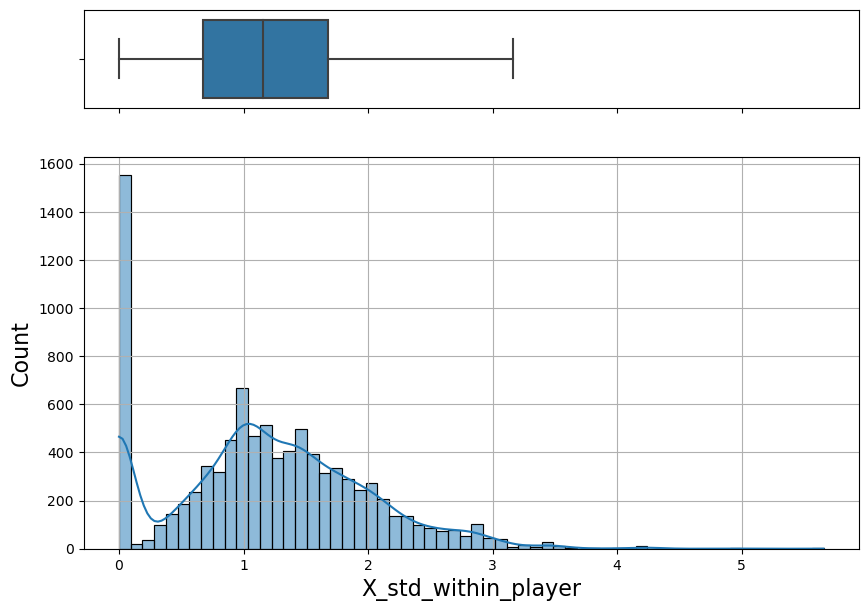

In [367]:
my_histogram(df_player_position.explode("position_X_list")[["player_api_id", "position_X_list"]].groupby("player_api_id").std() \
                               .rename(columns = {"position_X_list": "X_std_within_player"}), "X_std_within_player")

- Each player's standard deviation of their past X position values are very low. That is, each player's X positions usually do not change much from game to game.

In [368]:
df_player_position.explode("position_Y_list")[["player_api_id", "position_Y_list"]].groupby("player_api_id").std() \
    .rename(columns = {"position_Y_list": "Y_std_within_player"}).describe()

,Y_std_within_player
count,9310.000000
mean,0.650073
std,0.701840
min,0.000000
25%,0.000000
50%,0.507257
75%,1.129319
max,4.949747


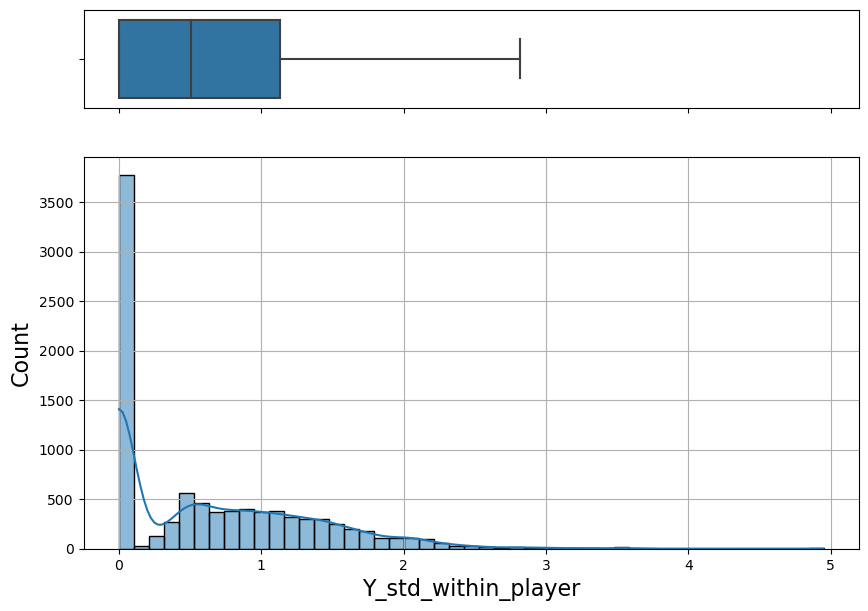

In [369]:
my_histogram(df_player_position.explode("position_Y_list")[["player_api_id", "position_Y_list"]].groupby("player_api_id").std() \
                               .rename(columns = {"position_Y_list": "Y_std_within_player"}), "Y_std_within_player")

- Each player's standard deviation of their past Y position values are very low. That is, each player's Y positions usually do not change much from game to game.

- So, let's make each player's mode X and Y position column in the df_player table and use them for player clustering later.

In [444]:
position_Y_mode = df_player_position.explode("position_Y_list")[["player_api_id", "position_Y_list"]].groupby("player_api_id")["position_Y_list"] \
                                    .apply(pd.Series.mode).reset_index() \
                                    .rename(columns = {"position_Y_list": "position_Y_mode"}).drop("level_1", axis = 1)
    

In [445]:
position_Y_mode

,player_api_id,position_Y_mode
0,2625,6.0
1,2625,7.0
2,2752,3.0
3,2768,3.0
4,2770,7.0
...,...,...
10693,728478,8.0
10694,730065,10.0
10695,733787,3.0
10696,748432,3.0


In [484]:
position_Y_mode_temp = df_player_position.explode("position_Y_list")[["player_api_id", "position_Y_list"]].groupby("player_api_id")["position_Y_list"] \
                                         .apply(pd.Series.mode).reset_index()
position_Y_mode= position_Y_mode_temp.loc[position_Y_mode_temp.level_1 == 0, ["player_api_id", "position_Y_list"]] \
                                     .rename(columns = {"position_Y_list": "position_Y_mode"})
position_Y_mode["position_Y_mode"] = position_Y_mode.position_Y_mode.astype("int")                                      
                                         

In [483]:
position_X_mode_temp = df_player_position.explode("position_X_list")[["player_api_id", "position_X_list"]].groupby("player_api_id")["position_X_list"] \
                                         .apply(pd.Series.mode).reset_index()
position_X_mode= position_X_mode_temp.loc[position_X_mode_temp.level_1 == 0, ["player_api_id", "position_X_list"]] \
                                     .rename(columns = {"position_X_list": "position_X_mode"})
position_X_mode["position_X_mode"] = position_X_mode.position_X_mode.astype("int")                                      

In [487]:
df_player = df_player.merge(position_X_mode, how = "left", on = "player_api_id") \
                     .merge(position_Y_mode, how = "left", on = "player_api_id") 

- Also we can categorize players into 4 position based on mode Y position: {"goalkeeper", "defender", "midfielder", "forward"}
    - mode Y position = 1: goalkeeper
    - $2 \leq \text{ mode Y position } \leq 5$: defender
    - $6 \leq \text{ mode Y position } \leq 8$: midefielder
    - $9 \leq \text{ mode Y position } \leq 11$: forward


In [491]:
goalkeeper_bool = (df_player.position_Y_mode == 1)
defender_bool = (df_player.position_Y_mode >= 2) & (df_player.position_Y_mode <= 5)
midfielder_bool = (df_player.position_Y_mode >= 6) & (df_player.position_Y_mode <= 8)
forward_bool = (df_player.position_Y_mode >= 9) & (df_player.position_Y_mode <= 11)

df_player.loc[goalkeeper_bool, "position_role"] = "goalkeeper"
df_player.loc[defender_bool, "position_role"] = "defender"
df_player.loc[midfielder_bool, "position_role"] = "midfielder"
df_player.loc[forward_bool, "position_role"] = "forward"

- Save the updated df_player table.


In [495]:
df_player.to_csv("../data/df_player.csv", index = False)

# 2. Starting lineup

In [497]:
starting_lineup_cols = ["match_api_id", 'home_player_1', 'home_player_2', 'home_player_3',
                        'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7',
                        'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11',
                        'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4',
                        'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8',
                        'away_player_9', 'away_player_10', 'away_player_11']

<AxesSubplot:>

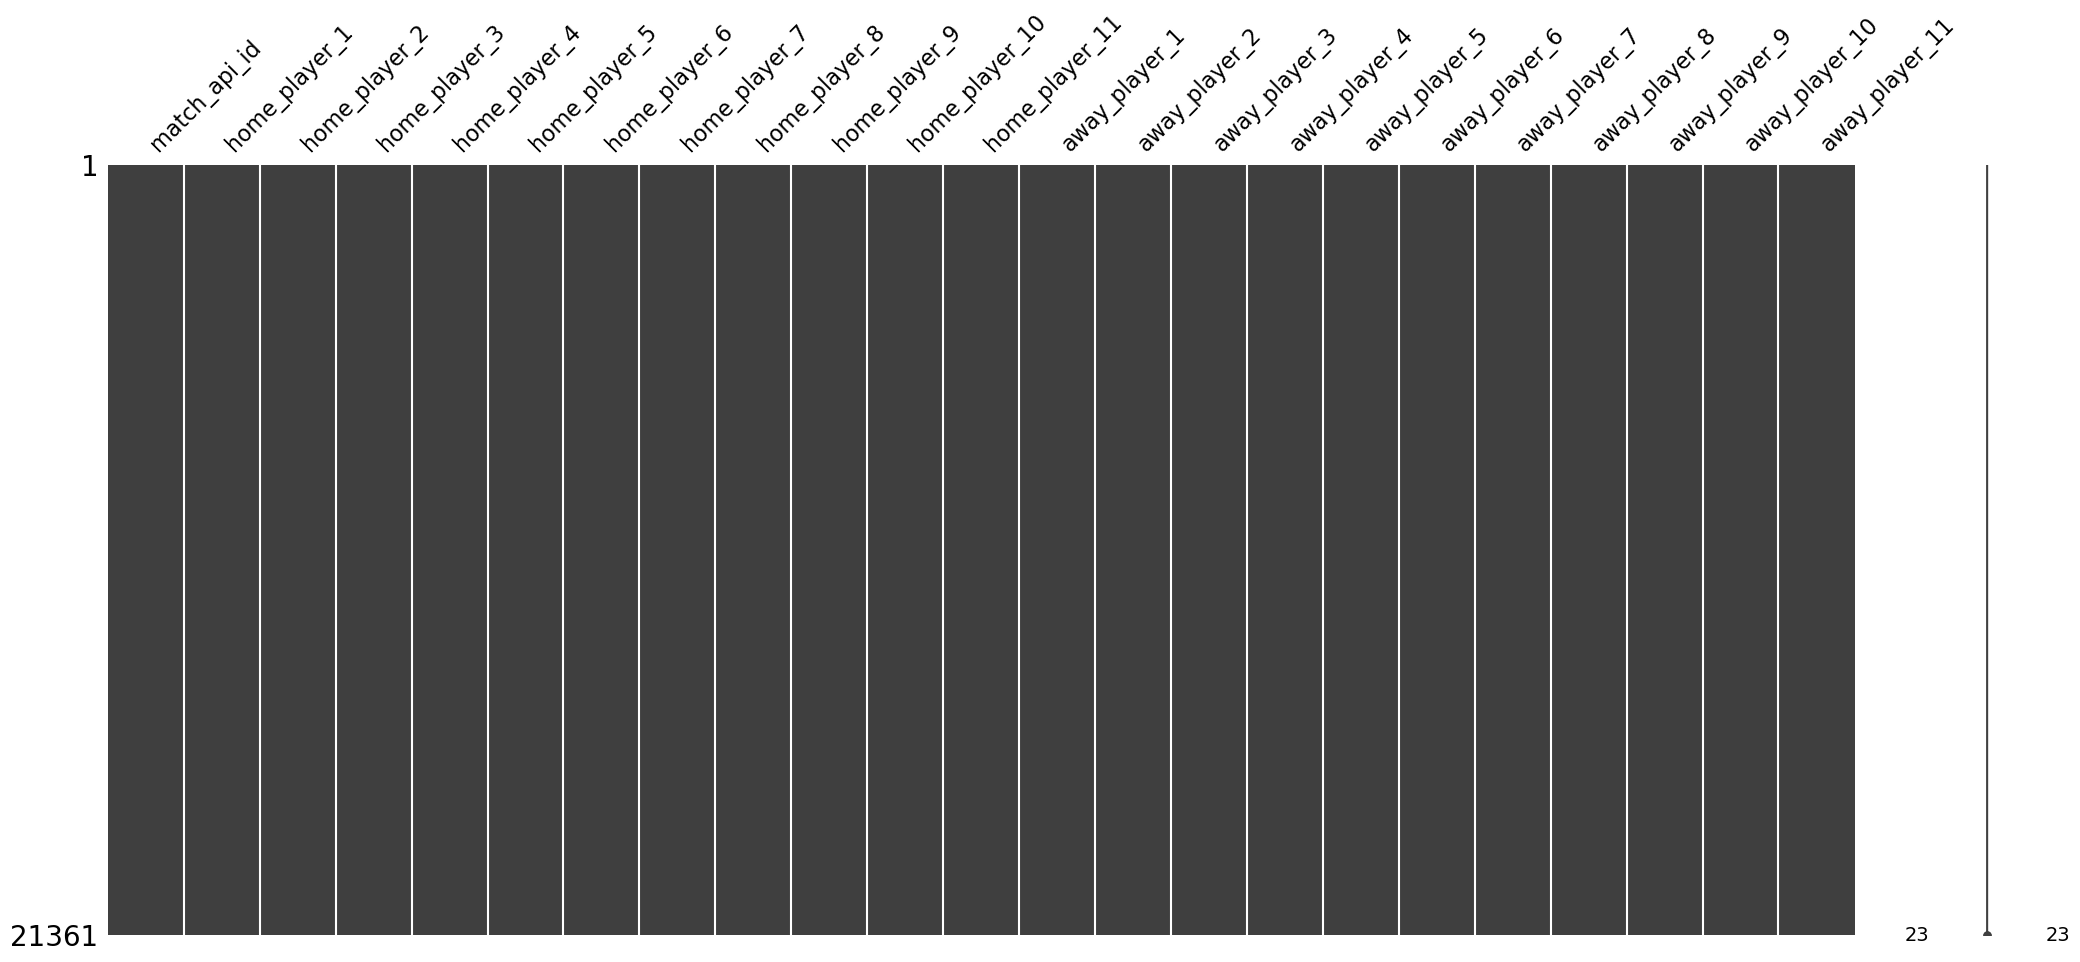

In [498]:
msno.matrix(df_match_player[starting_lineup_cols])

- Since we alread droped all missing values, there is no missing value in the starting lineup columns.

- Starting lineup colums will be used to merge other player related tables later.

# <font color="magenta">3. Summary</font>

- Drop the matches that have the missing value in the starting lineups and the player positions.
    - 25,979 matches -> 21,351 matches
        - train matces: 22,653 -> 18,343 
        - test matches: 3,326 -> 3,018    

- Make the home and away team's starting formation variables based on starting player's X and Y positions.
    - home_formation_by_X (in df_match_formation table)
    - home_formation_by_Y (in df_match_formation table)
    - away_formation_by_X (in df_match_formation table)
    - away_formation_by_Y (in df_match_formation table)

- Make each player's mode X and Y position variables that will be used for players clustering later.
    - position_X_mode (in df_player table)
    - position_Y_mode (in df_player table)

- Make each player's role variable based on mode Y position.
    - position_role (in df_player table)

![2.2.summary](../images/2.2.eda-summary.png)